In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
class HiddenMarkovModel:
    def __init__(self, transition_prob, emission_prob, initial_prob):
        self.transition_prob = transition_prob
        self.emission_prob = emission_prob
        self.initial_prob = initial_prob
        self.num_states = transition_prob.shape[0]
        self.num_obs = emission_prob.shape[1]

    def forward(self, observations):
        T = len(observations)
        alpha = np.zeros((T, self.num_states))

        # Initialize base case
        alpha[0] = self.initial_prob * self.emission_prob[:, observations[0]]

        # Forward Procedure
        for t in range(1, T):
            for j in range(self.num_states):
                alpha[t, j] = np.dot(alpha[t - 1], self.transition_prob[:, j]) * self.emission_prob[j, observations[t]]

        return alpha

    def backward(self, observations):
        T = len(observations)
        beta = np.zeros((T, self.num_states))

        # Initialize base case
        beta[-1] = 1

        # Backward Procedure
        for t in range(T - 2, -1, -1):
            for i in range(self.num_states):
                beta[t, i] = np.sum(self.transition_prob[i, :] * self.emission_prob[:, observations[t + 1]] * beta[t + 1])

        return beta
    
    def viterbi(self, observations):
        T = len(observations)
        delta = np.zeros((T, self.num_states))
        psi = np.zeros((T, self.num_states), dtype=int)

        # Initialize base case
        delta[0] = self.initial_prob * self.emission_prob[:, observations[0]]

        # Viterbi Algorithm
        for t in range(1, T):
            for j in range(self.num_states):
                delta[t, j] = np.max(delta[t - 1] * self.transition_prob[:, j]) * self.emission_prob[j, observations[t]]
                psi[t, j] = np.argmax(delta[t - 1] * self.transition_prob[:, j])

        # Backtrack to find the most likely sequence
        states = np.zeros(T, dtype=int)
        states[-1] = np.argmax(delta[-1])
        for t in range(T - 2, -1, -1):
            states[t] = psi[t + 1, states[t + 1]]

        return states, np.max(delta[-1])
    
    def output_sequence_probability(self, observations):
        # Forward Procedure
        alpha = self.forward(observations)
        prob_forward = np.sum(alpha[-1])

        # Backward Procedure
        beta = self.backward(observations)
        prob_backward = np.sum(self.initial_prob * self.emission_prob[:, observations[0]] * beta[0])

        return prob_forward, prob_backward
        
    def visualize(self):
        G = nx.MultiDiGraph()

        # Add nodes for states
        for i in range(self.num_states):
            G.add_node(i, label=f'State {i}\n{self.initial_prob[i]:.2f}')

        # Add emission probabilities as labels to states
        for i in range(self.num_states):
            for k in range(self.num_obs):
                G.nodes[i]['label'] += f'\nObs {k} | {self.emission_prob[i][k]:.2f}'

        # Add edges for transitions with labels as probabilities
        for i in range(self.num_states):
            for j in range(self.num_states):
                prob = self.transition_prob[i][j]
                G.add_edge(i, j, label=f'{prob:.2f}')

        # Plotting
        pos = nx.spring_layout(G,scale=20)
        node_labels = nx.get_node_attributes(G, 'label')
        edge_labels = nx.get_edge_attributes(G, 'label')

        nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.title("Hidden Markov Model")
        plt.show()

In [8]:
class HiddenMarkovModel:
    def __init__(self, transition_prob, emission_prob, initial_prob):
        self.transition_prob = transition_prob
        self.emission_prob = emission_prob
        self.initial_prob = initial_prob
        self.num_states = transition_prob.shape[0]
        self.num_obs = emission_prob.shape[1]

    def forward(self, observations):
        T = len(observations)
        alpha = np.zeros((T, self.num_states))

        # Initialize base case
        alpha[0] = self.initial_prob * self.emission_prob[:, observations[0]]

        # Forward Procedure
        for t in range(1, T):
            for j in range(self.num_states):
                alpha[t, j] = np.dot(alpha[t - 1], self.transition_prob[:, j]) * self.emission_prob[j, observations[t]]

        return alpha

    def backward(self, observations):
        T = len(observations)
        beta = np.zeros((T, self.num_states))

        # Initialize base case
        beta[-1] = 1

        # Backward Procedure
        for t in range(T - 2, -1, -1):
            for i in range(self.num_states):
                beta[t, i] = np.sum(self.transition_prob[i, :] * self.emission_prob[:, observations[t + 1]] * beta[t + 1])

        return beta
    
    def viterbi(self, observations):
        T = len(observations)
        delta = np.zeros((T, self.num_states))
        psi = np.zeros((T, self.num_states), dtype=int)

        # Initialize base case
        delta[0] = self.initial_prob * self.emission_prob[:, observations[0]]

        # Viterbi Algorithm
        for t in range(1, T):
            for j in range(self.num_states):
                delta[t, j] = np.max(delta[t - 1] * self.transition_prob[:, j]) * self.emission_prob[j, observations[t]]
                psi[t, j] = np.argmax(delta[t - 1] * self.transition_prob[:, j])

        # Backtrack to find the most likely sequence
        states = np.zeros(T, dtype=int)
        states[-1] = np.argmax(delta[-1])
        for t in range(T - 2, -1, -1):
            states[t] = psi[t + 1, states[t + 1]]

        return states, np.max(delta[-1])
    
    def output_sequence_probability(self, observations):
        # Forward Procedure
        alpha = self.forward(observations)
        prob_forward = np.sum(alpha[-1])

        # Backward Procedure
        beta = self.backward(observations)
        prob_backward = np.sum(self.initial_prob * self.emission_prob[:, observations[0]] * beta[0])

        return prob_forward, prob_backward
        
    def visualize(self):
        G = nx.MultiDiGraph()

        # Add nodes for states
        for i in range(self.num_states):
            G.add_node(i, label=f'State {i}\n{self.initial_prob[i]:.2f}')

        # Add emission probabilities as labels to states
        for i in range(self.num_states):
            for k in range(self.num_obs):
                G.nodes[i]['label'] += f'\nObs {k} | {self.emission_prob[i][k]:.2f}'

        # Add edges for transitions with labels as probabilities
        for i in range(self.num_states):
            for j in range(self.num_states):
                prob = self.transition_prob[i][j]
                G.add_edge(i, j, label=f'{prob:.2f}')

        # Plotting
        pos = nx.spring_layout(G,scale=20)
        node_labels = nx.get_node_attributes(G, 'label')
        edge_labels = {(i, j): label['label'] for i, j, label in G.edges(data=True)}

        nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.title("Hidden Markov Model")
        plt.show()


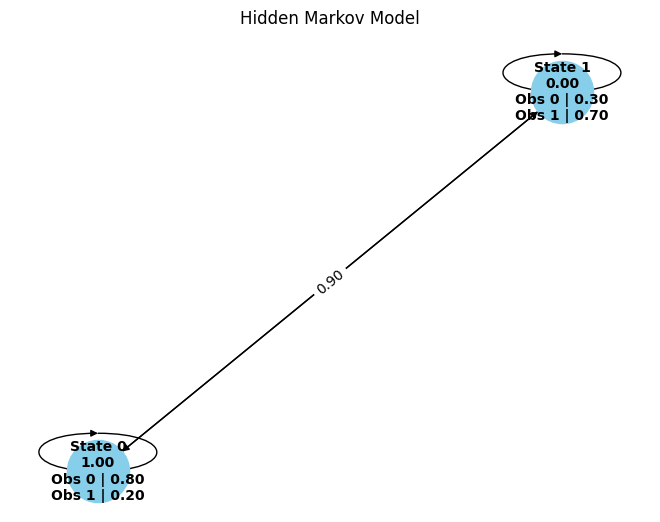

In [10]:
# Example usage:
transition_prob = np.array([[0.6, 0.4],
                            [0.9, 0.1]])
emission_prob = np.array([[0.8, 0.2],
                          [ 0.3, 0.7]])
initial_prob = np.array([1, 0])

observations = [0, 1, 0, 1]  # Sequence of observations

hmm = HiddenMarkovModel(transition_prob, emission_prob, initial_prob)

# Visualize the HMM
hmm.visualize()

In [4]:
# Forward Procedure
alpha = hmm.forward(observations)
print("Forward Procedure:")
print(alpha)

# Backward Procedure
beta = hmm.backward(observations)
print("\nBackward Procedure:")
print(beta)

Forward Procedure:
[[0.06       0.24      ]
 [0.069      0.0162    ]
 [0.021912   0.009126  ]
 [0.0094944  0.00120492]]

Backward Procedure:
[[0.048658 0.032416]
 [0.1298   0.1076  ]
 [0.38     0.26    ]
 [1.       1.      ]]


In [5]:
# Output sequence probability using forward and backward procedures

prob_forward, prob_backward = hmm.output_sequence_probability(observations)
print("Probability of the output sequence using forward procedure:", prob_forward)
print("Probability of the output sequence using backward procedure:", prob_backward)


Probability of the output sequence using forward procedure: 0.01069932
Probability of the output sequence using backward procedure: 0.01069932


In [6]:

# Most likely hidden state sequence and its probability using Viterbi algorithm
sequence, prob_viterbi = hmm.viterbi(observations)
print("\nMost likely hidden state sequence using Viterbi algorithm:", sequence)
print("Probability of the most likely hidden state sequence using Viterbi algorithm:", prob_viterbi)


Most likely hidden state sequence using Viterbi algorithm: [1 0 0 0]
Probability of the most likely hidden state sequence using Viterbi algorithm: 0.004704
